In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv(r'Churn_Modelling.csv')

In [3]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
df.drop(columns = ['RowNumber','CustomerId','Surname'],inplace=True)

In [5]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [6]:
df["Geography"].value_counts()

Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64

<Axes: xlabel='Geography'>

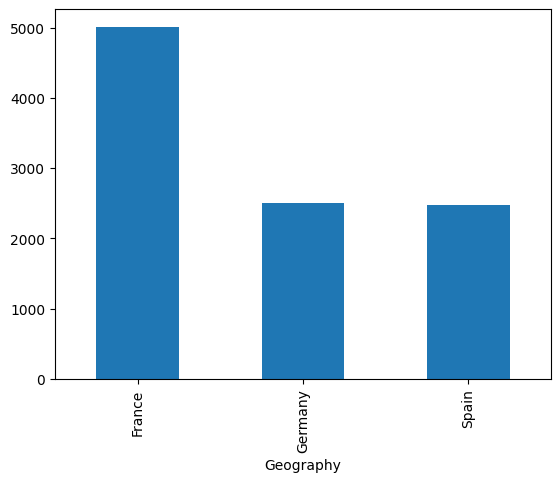

In [7]:
df["Geography"].value_counts().plot(kind="bar")

In [8]:
df['Gender'].value_counts()

Gender
Male      5457
Female    4543
Name: count, dtype: int64

<Axes: xlabel='Gender'>

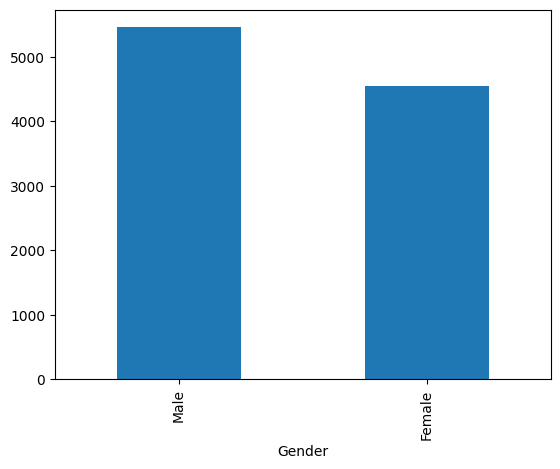

In [9]:
df['Gender'].value_counts().plot(kind="bar")

In [10]:
df = pd.get_dummies(df,columns=["Geography","Gender"], drop_first="True")

In [11]:
df

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,False,False,False
1,608,41,1,83807.86,1,0,1,112542.58,0,False,True,False
2,502,42,8,159660.80,3,1,0,113931.57,1,False,False,False
3,699,39,1,0.00,2,0,0,93826.63,0,False,False,False
4,850,43,2,125510.82,1,1,1,79084.10,0,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0,False,False,True
9996,516,35,10,57369.61,1,1,1,101699.77,0,False,False,True
9997,709,36,7,0.00,1,0,1,42085.58,1,False,False,False
9998,772,42,3,75075.31,2,1,0,92888.52,1,True,False,True


### We should always scale the data before giving it to a neural network

In [29]:
X = df.drop(columns=["Exited"])
y = df["Exited"]
from sklearn.model_selection import train_test_split
X_train, X_test,y_train,y_test = train_test_split(X,y, test_size=0.2,random_state=0)

In [30]:
X

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,False,False,False
1,608,41,1,83807.86,1,0,1,112542.58,False,True,False
2,502,42,8,159660.80,3,1,0,113931.57,False,False,False
3,699,39,1,0.00,2,0,0,93826.63,False,False,False
4,850,43,2,125510.82,1,1,1,79084.10,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,False,False,True
9996,516,35,10,57369.61,1,1,1,101699.77,False,False,True
9997,709,36,7,0.00,1,0,1,42085.58,False,False,False
9998,772,42,3,75075.31,2,1,0,92888.52,True,False,True


In [31]:
X_train.shape

(8000, 11)

In [32]:
y_train

7389    0
9275    0
2995    0
5316    0
356     0
       ..
9225    0
4859    0
3264    0
9845    0
2732    1
Name: Exited, Length: 8000, dtype: int64

* Ques -  why did we use fit_transform to scale x_train and just transform to scale X_test ??? 
* Answer - it's important to understand the difference between fit_transform and transform methods. These methods are used differently for the training and testing datasets to ensure that the scaling is applied correctly and consistently. Here's an explanation:

fit_transform vs. transform

fit_transform:

Purpose: This method first computes the mean and standard deviation of the training data and then scales the data using these computed values.
Usage: You use fit_transform on the training data (X_train) because you need to calculate the scaling parameters (mean and standard deviation) based on the training data. These parameters are then used to transform the training data itself.
Code: X_train_scaled = scaler.fit_transform(X_train)

transform:

Purpose: This method uses the mean and standard deviation computed during the fit_transform step to scale new data (in this case, the test data).
Usage: You use transform on the test data (X_test) to ensure that the test data is scaled using the same parameters (mean and standard deviation) as the training data. This is crucial for maintaining consistency between how the training and testing datasets are scaled.
Code: X_test_scaled = scaler.transform(X_test)

In [33]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [34]:
X_train_scaled

array([[ 0.16958176, -0.46460796,  0.00666099, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       [-2.30455945,  0.30102557, -1.37744033, ...,  1.75486502,
        -0.57369368,  0.91601335],
       [-1.19119591, -0.94312892, -1.031415  , ..., -0.5698444 ,
        -0.57369368, -1.09168714],
       ...,
       [ 0.9015152 , -0.36890377,  0.00666099, ..., -0.5698444 ,
        -0.57369368,  0.91601335],
       [-0.62420521, -0.08179119,  1.39076231, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       [-0.28401079,  0.87525072, -1.37744033, ...,  1.75486502,
        -0.57369368, -1.09168714]])

In [35]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [ ]:
model = Sequential()

model.add(Dense(11,activation="sigmoid", input_dim = 11))
model.add(Dense(11,activation="relu"))
model.add(Dense(1,activation='relu'))


In [37]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_2 (Dense)                 │ (None, 11)             │           132 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 11)             │           132 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 1)              │            12 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 276 (1.08 KB)

 Trainable params: 276 (1.08 KB)

 Non-trainable params: 0 (0.00 B)

In [38]:
model.compile(loss="binary_crossentropy", optimizer="Adam",metrics=['accuracy'])

In [62]:
history = model.fit(X_train,y_train,batch_size=50,epochs=49,verbose=1,validation_split=0.2)

Epoch 1/49
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8018 - loss: 1.3774 - val_accuracy: 0.7969 - val_loss: 1.5202
Epoch 2/49
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 901us/step - accuracy: 0.8005 - loss: 1.3256 - val_accuracy: 0.7969 - val_loss: 1.5189
Epoch 3/49
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 859us/step - accuracy: 0.8020 - loss: 1.3914 - val_accuracy: 0.7969 - val_loss: 1.5197
Epoch 4/49
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 884us/step - accuracy: 0.7981 - loss: 1.3467 - val_accuracy: 0.7969 - val_loss: 1.5189
Epoch 5/49
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 882us/step - accuracy: 0.8005 - loss: 1.3650 - val_accuracy: 0.7969 - val_loss: 1.5194
Epoch 6/49
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 853us/step - accuracy: 0.8003 - loss: 1.3133 - val_accuracy: 0.7969 - val_loss: 1.5198
Epoch 7/49
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7937 - loss: 1.3641 - val_accuracy: 0.7969 - val_loss: 1.5191
Epoch 8/49
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 898us/step - accuracy: 0.8034 - loss: 1.3224 - val_

In [63]:
# model.fit(X_train_scaled,y_train,epochs=10)

In [64]:
y_pred = model.predict(X_test)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 528us/step


In [65]:
y_pred

array([[0.24924581],
       [0.24192679],
       [0.24192679],
       ...,
       [0.24192679],
       [0.        ],
       [0.24924581]], dtype=float32)

To find weights and bias of each layer = model.layer[n].get_weights()

In [66]:
y_pred = y_pred.argmax(axis=-1)

In [67]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.7975

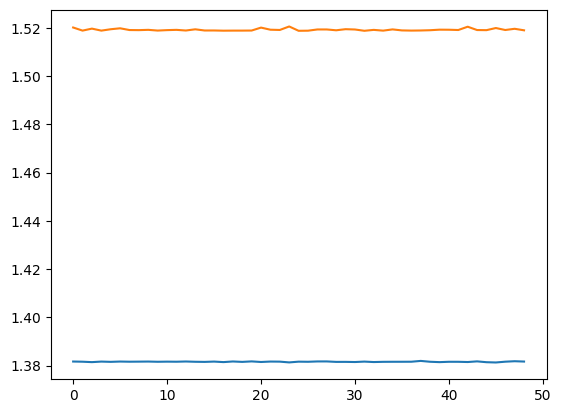

In [68]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

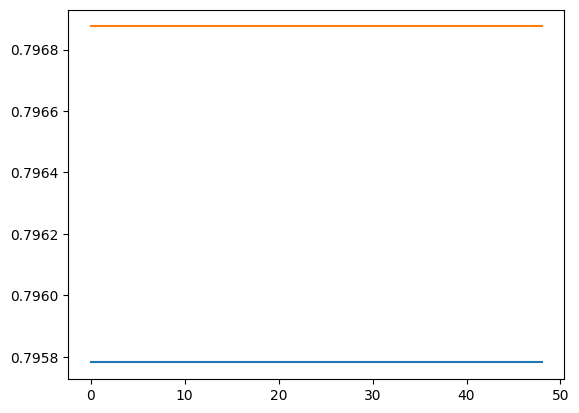

In [69]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])